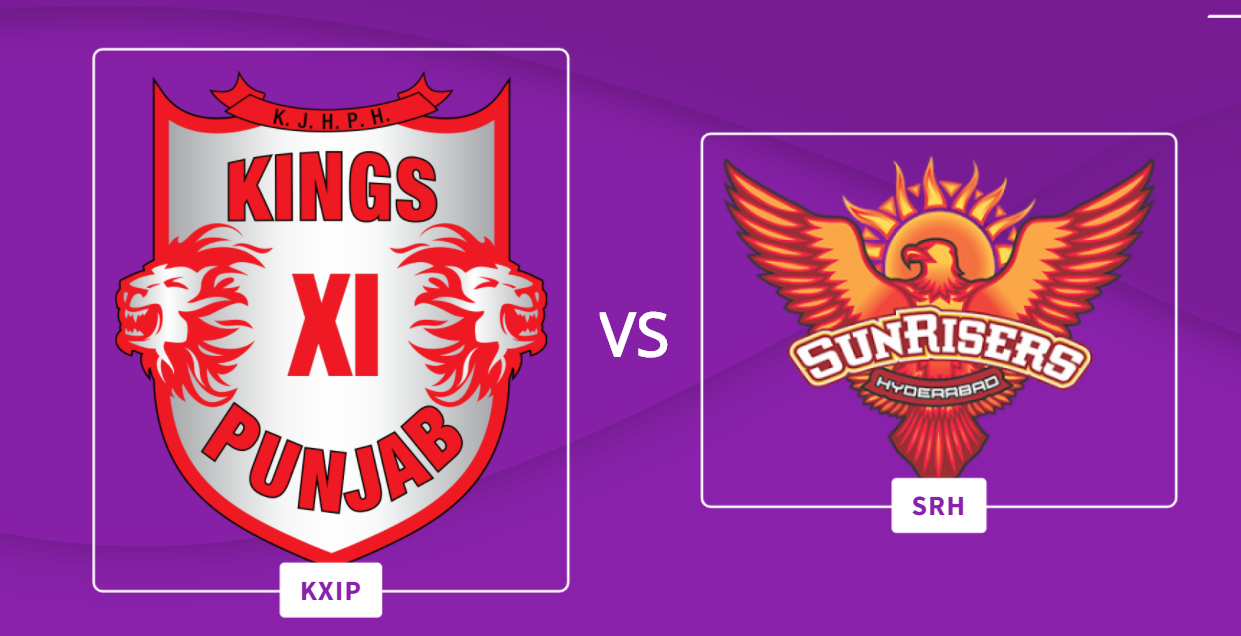

In [1]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


In [2]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


In [3]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

In [40]:
SRH_batsmen = ['J Bairstow', 'DA Warner', 'MK Pandey', 'JO Holder', 'KS Williamson', 'Mohammad Nabi','V Shankar']
# Samad and Garg no data available
# Williamson injured hence will not likely to play

SRH_bowlers = ['Sandeep Sharma' ,'T Natarajan', 'JO Holder', 'Rashid Khan', 'V Shankar', 'S Nadeem' ]
# 'K Ahmed' , 'Basil Thampi'
#############################################################################################################################

KXIP_bowlers = ['Mohammed Shami', 'A Singh', 'JDS Neesham' , 'M Ashwin', 'GJ Maxwell']
# 'CJ Jordan' not playing
# R bishnoi: New (KXIP bowler) : ER: 7.85

KXIP_batsmen = ['KL Rahul',  'MA Agarwal', 'CH Gayle', 'N Pooran', 'GJ Maxwell', 'DJ Hooda', 'JDS Neesham' ]
# D padikkal new player(RCB batsmen): SR: 126.56, balls faced :192, Runs : 243, matches:7


# Question 1: Who will win?

In [308]:
KXIP_SRH = matches[((matches.team1 == "Kings XI Punjab") & (matches.team2 == "Sunrisers Hyderabad")) | ((matches.team2 == "Kings XI Punjab") & (matches.team1 == "Sunrisers Hyderabad"))]

win_SC = pd.DataFrame(RR_SRH['winner'].value_counts())
win_SC['Team_name'] = win_SC.index
win_SC

color_ = ['LightBlue', 'Yellow']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_SC['Team_name'], win_SC['winner'], color=color_, alpha=0.8)

    
plt.title('Number of Wins by SRH and KXIP',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

In [311]:
venue = 'Dubai International Cricket Stadium'
KXIP_ = matches[((matches.team1 == "Kings XI Punjab") | (matches.team2 == "Kings XI Punjab"))]
KXIP_[KXIP_.venue == venue]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN


In [312]:
venue = 'Dubai International Cricket Stadium'
SRH_ = matches[((matches.team1 == "Sunrisers Hyderabad") | (matches.team2 == "Sunrisers Hyderabad"))]
SRH_[SRH_.venue == venue]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


## SRH seems to be leading here

## But the Players of the Team are more important than just the names of the teams, Hence Batsmen , bowlers and their performances matter alot here

## Following would be the Strategies

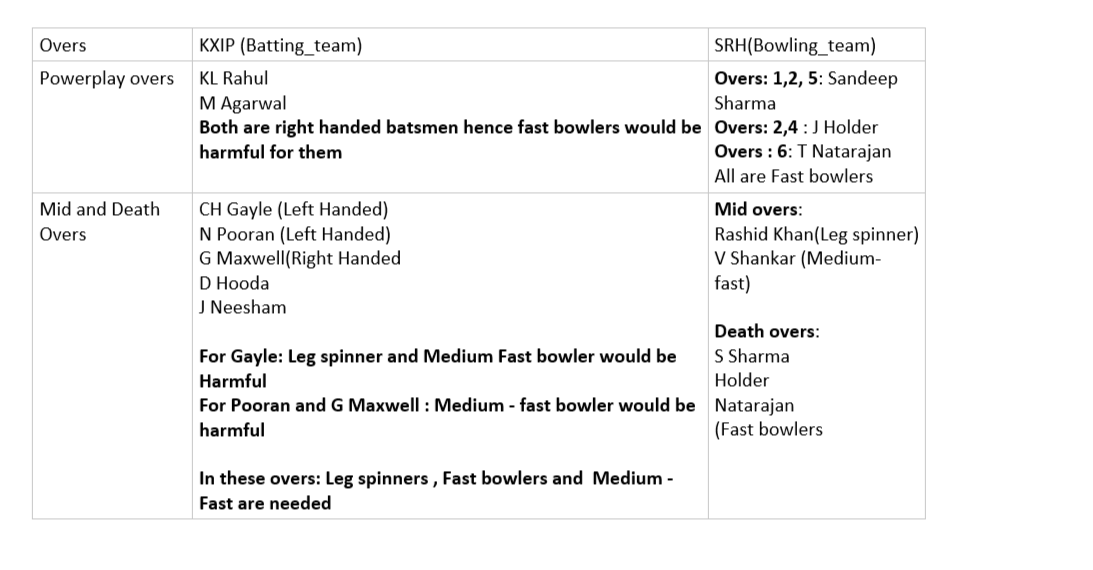

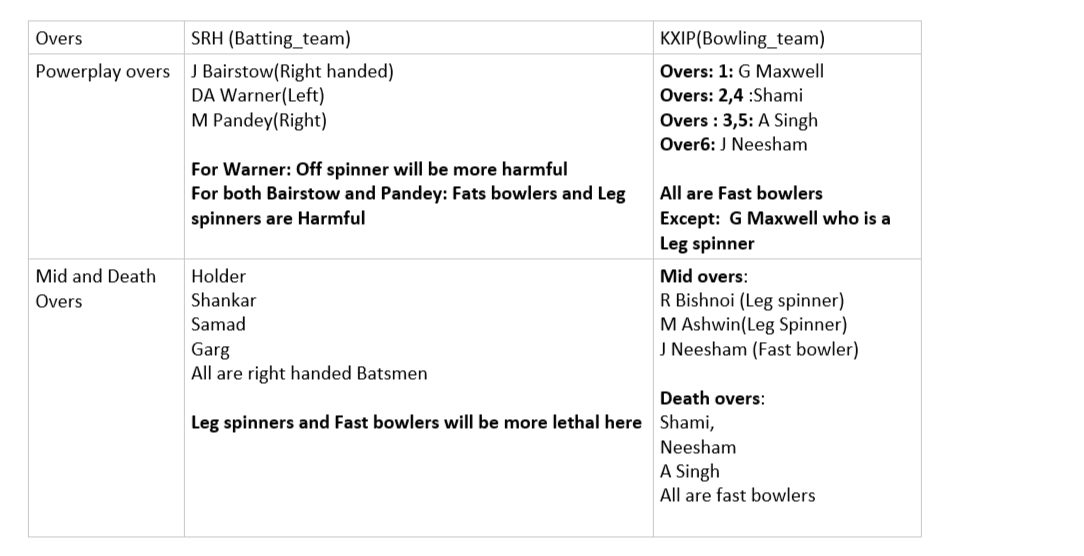

## Players' Performance wise KXIP is leading, Hene, It might win today

# Question 2:<br>Which of the following will be true for David Warner?
[Out, Strike Rate above 125, Not Out, Strike Rate above 125, Out, Strike Rate below 125, Not Out, Strike Rate below 125]

## 2.1

In [53]:
dw = deliveries[deliveries.batsman == 'DA Warner']
dw['player_dismissed'].loc[dw['player_dismissed'] == 'DA Warner'] = 1
dw['player_dismissed'].loc[dw['player_dismissed'] != 1] = 0

dw_data = dw.groupby(['match_id'])['batsman_runs'].count().reset_index(name = "balls_faced")
dw1 = dw.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs_scored")
dw_data["runs_scored"] = dw1.runs_scored
dw_data["strike_rate"] = dw_data.runs_scored*100/dw_data.balls_faced

dw2 = dw.groupby(['match_id'])['player_dismissed'].sum().reset_index(name = "dismissal")
dw_data["dismissal"] = dw2["dismissal"]
status = ["out, strike rate above 125", "Not Out, Strike Rate above 125", "Out, Strike Rate below 125", "Not Out, Strike Rate below 125"]
percent = [(dw_data[(dw_data.dismissal ==1) & (dw_data.strike_rate >125)].shape[0]/dw_data.shape[0])*100,
           (dw_data[(dw_data.dismissal == 0) & (dw_data.strike_rate >125)].shape[0]/dw_data.shape[0])*100,
           (dw_data[(dw_data.dismissal ==1) & (dw_data.strike_rate < 125)].shape[0]/dw_data.shape[0])*100,
           (dw_data[(dw_data.dismissal == 0) & (dw_data.strike_rate <125)].shape[0]/dw_data.shape[0])*100]

print("out, strike rate above 125")
print(dw_data[(dw_data.dismissal ==1) & (dw_data.strike_rate >125)], "\n")
print("################################################################################################################")
print("out, strike rate above 125 : percentage", (dw_data[(dw_data.dismissal ==1) & (dw_data.strike_rate >125)].shape[0]/dw_data.shape[0])*100)
print("################################################################################################################")

print("Not Out, Strike Rate above 125")
print(dw_data[(dw_data.dismissal == 0) & (dw_data.strike_rate >125)], "\n")
print("################################################################################################################")
print("Not Out, Strike Rate above 125 : percentage", (dw_data[(dw_data.dismissal == 0) & (dw_data.strike_rate >125)].shape[0]/dw_data.shape[0])*100)
print("################################################################################################################")

print("Out, Strike Rate below 125")
print(dw_data[(dw_data.dismissal ==1) & (dw_data.strike_rate < 125)], "\n")
print("################################################################################################################")
print("Out, Strike Rate below 125 : percentage", (dw_data[(dw_data.dismissal ==1) & (dw_data.strike_rate < 125)].shape[0]/dw_data.shape[0])*100)
print("################################################################################################################")

print("Not Out, Strike Rate below 125")
print(dw_data[(dw_data.dismissal == 0) & (dw_data.strike_rate <125)], "\n")
print("################################################################################################################")
print("Not Out, Strike Rate below 125 : percentage", (dw_data[(dw_data.dismissal == 0) & (dw_data.strike_rate <125)].shape[0]/dw_data.shape[0])*100)
print("################################################################################################################")


out, strike rate above 125
     match_id  balls_faced  runs_scored  strike_rate  dismissal
0           1            9           14   155.555556          1
2          10           34           49   144.117647          1
7          32           27           51   188.888889          1
8          36           60          126   210.000000          1
9          39           21           30   142.857143          1
14        141           40           51   127.500000          1
15        146           23           36   156.521739          1
17        154           25           36   144.000000          1
19        170            9           15   166.666667          1
23        197           15           33   220.000000          1
26        209           22           33   150.000000          1
29        221           15           31   206.666667          1
34        250           28           46   164.285714          1
36        259           50           77   154.000000          1
44        301

In [64]:

from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip

pie = Pie(sizes=list(percent), labels=list(status),
          stroke="black",
          opacities = [0.8, 0.8, 0.8],
          radius=180, inner_radius=80,
          sort=True,
          display_values=True, values_format='0.0f',
          label_color="white", font_size="16px", font_weight="bolder"
          )

fig = Figure(marks=[pie],
             legend_location = "top",
             title=" Figure 1. DA Warner's performance",
             fig_margin= dict(top=60, bottom=40, left=50, right=20),
             background_style = {"fill":"black"}

      )

fig.layout.width="800px"
fig.layout.height="500px"

pie.tooltip = Tooltip(fields=['sizes'], labels=["Count"], formats=["0.1f"])

#fig

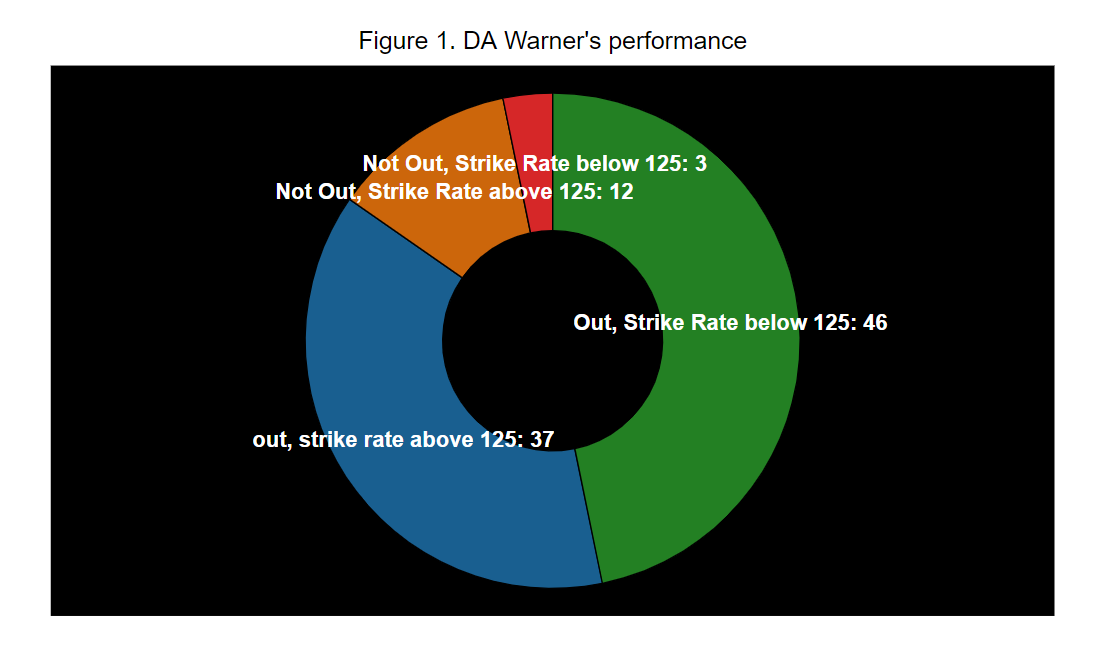

In [314]:
dw_data["index"] = dw_data.index
import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='polar',sharing='public',offline=True)
dw_data.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["balls_faced","runs_scored","strike_rate", "dismissal"],
                title="Figure 2 : balls faced, runs scored and strike rate of DA Warner Matchwise",
                theme="polar")

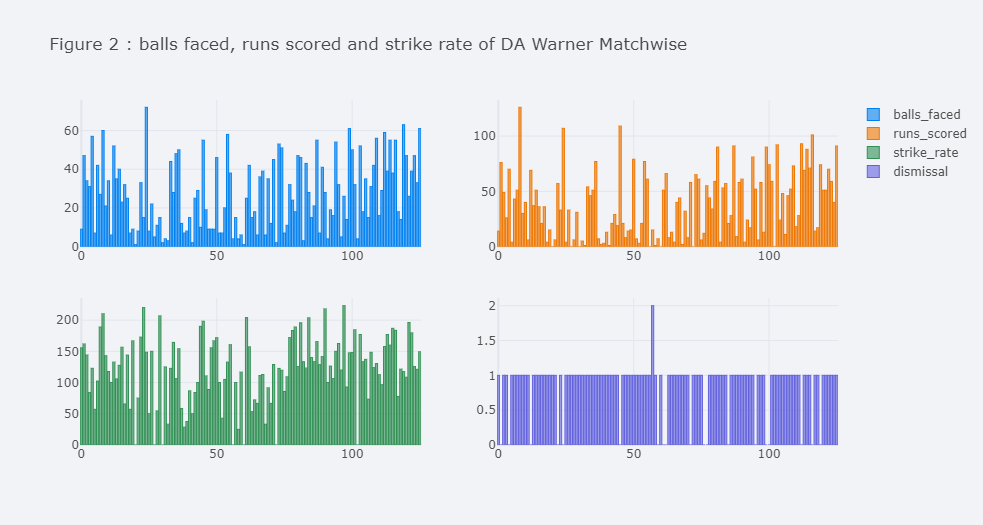

In [55]:
print("average strike rate of DA warner is :", dw_data.runs_scored.sum()*100/dw_data.balls_faced.sum())
print("percentage of times got out :", (dw_data.dismissal.sum()/dw_data.shape[0])*100)
print("Average balls faced by Warner are : ",dw_data.balls_faced.mean())

average strike rate of DA warner is : 139.52324896998235
percentage of times got out : 85.71428571428571
Average balls faced by Warner are :  26.96825396825397


## 2.2 Against KXIP bowlers

### Warner is a Left handed batsman hence, Off spinner(right handed) would be the best option against him hence , G Maxwell is the right hand off spinner of KXIP.
### He will also face Shami and Arshdeep singh who are Powerplay bowlers.


In [59]:
KXIP_powerplay = ['Mohammed Shami', 'A Singh','GJ Maxwell', 'JDS Neesham']
dw_ = deliveries[(deliveries.batsman == 'DA Warner') & (deliveries.bowler.isin(KXIP_powerplay))]
dw_['player_dismissed'].loc[dw_['player_dismissed'] == 'DA Warner'] = 1
dw_['player_dismissed'].loc[dw_['player_dismissed'] != 1] = 0

dw_data_ = dw_.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
dw1_ = dw_.groupby(['bowler'])['batsman_runs'].sum().reset_index(name = "runs_scored")
dw_data_["runs_scored"] = dw1_.runs_scored
dw_data_["strike_rate"] = dw_data_.runs_scored*100/dw_data_.balls_faced

dw2_ = dw_.groupby(['bowler'])['player_dismissed'].sum().reset_index(name = "dismissal")
dw_data_["dismissal"] = dw2_["dismissal"]
dw_data_

,bowler,balls_faced,runs_scored,strike_rate,dismissal
0,A Singh,20,22,110.000000,1
1,GJ Maxwell,21,25,119.047619,1
2,Mohammed Shami,34,50,147.058824,1


In [61]:
print("Average strike rate against KXIP bowlers is :", (dw_data_.runs_scored.sum()*100)/dw_data_.balls_faced.sum())

Average strike rate against KXIP bowlers is : 129.33333333333334


## By comparing the strike rates in Overall IPL and against KXIP bowlers , we can say that his status today will be: Out and strike rate greater than 125

# Question 3:
## What would be KL Rahul's contribution to the team total? [NOTE : Round off to nearest integral value]
options: [Less than 8%, 8-14%, 15-22%, 23% or more]

## 3.1

In [113]:
kl = deliveries[deliveries.batsman == 'KL Rahul']

kl_data = kl.groupby(['match_id', "inning"])['batsman_runs'].count().reset_index(name = "balls_faced")
kl1 = kl.groupby(['match_id', "inning"])['batsman_runs'].sum().reset_index(name = "runs_scored")
kl_data["runs_scored"] = kl1.runs_scored

m_list = kl1.match_id.unique()
x = deliveries[deliveries.match_id.isin(m_list)]
x["inning_runs"] = x.groupby(['match_id', 'inning'])['total_runs'].cumsum()
kl_matches  = x.groupby(['match_id','inning'])['inning_runs'].max().reset_index()

kl_matches.values

m_id = []
inn = []
runs = []
for i in kl1.match_id.unique():
    for j in kl_matches[kl_matches.match_id == i].inning.values:
        if j == kl1[kl1.match_id == i].inning.unique():
            t = kl_matches[kl_matches.match_id == i][kl_matches.inning == j].inning_runs.values[0]
            m_id.append(i)
            inn.append(j)
            runs.append(t)
            
kl_matches1 = pd.DataFrame(list(zip(m_id, inn, runs)), 
               columns =['id', 'inning', 'team_score'])

kl_d = pd.merge(kl_data, kl_matches1, left_on='match_id', right_on='id')
kl_data_  = kl_d[["match_id", "balls_faced", "runs_scored", "team_score"]]

kl_data_["share_of_runs"] = (kl_data_.runs_scored/kl_data_.team_score)*100
kl_data_

,match_id,balls_faced,runs_scored,team_score,share_of_runs
0,401,12,12,152,7.894737
1,429,4,8,174,4.597701
2,461,19,20,133,15.037594
3,466,28,27,121,22.314050
4,474,27,25,145,17.241379
5,477,40,46,172,26.744186
6,481,6,6,155,3.870968
7,487,18,18,134,13.432836
8,493,13,10,157,6.369427
9,500,15,14,142,9.859155


In [122]:
kl_data_["index"] = kl_data_.index
import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='polar',sharing='public',offline=True)
kl_data_.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["runs_scored","share_of_runs"],
                title="Figure 3: Share of KL Rahul's Runs in IPL (Matchwise)",
                theme="polar")

In [125]:
# share of runs less than 8%
print("share of runs less than 8%\n",kl_data_[kl_data_.share_of_runs < 8])
print("#####################################################################")
print("share of runs less than 8% - percentage: ", (kl_data_[kl_data_.share_of_runs < 8].shape[0]/kl_data_.shape[0])*100)
print("#####################################################################")
print("share of runs  8-14\n",kl_data_[(kl_data_.share_of_runs >=8) & (kl_data_.share_of_runs <=14)])
print("#####################################################################")
print("share of runs  8-14 - percentage:",(kl_data_[(kl_data_.share_of_runs >=8) & (kl_data_.share_of_runs <=14)].shape[0]/kl_data_.shape[0])*100)
print("#####################################################################")
print("share of runs  15-22\n",kl_data_[(kl_data_.share_of_runs >=15) & (kl_data_.share_of_runs <=22)])
print("#####################################################################")
print("share of runs  15-22 = percentage", (kl_data_[(kl_data_.share_of_runs >=15) & (kl_data_.share_of_runs <=22)].shape[0]/kl_data_.shape[0])*100)
print("#####################################################################")
print("share of runs more than 23%\n",kl_data_[kl_data_.share_of_runs > 23])
print("#####################################################################")
print("share of runs more than 23% - percentage : ", (kl_data_[kl_data_.share_of_runs > 23].shape[0]/kl_data_.shape[0])*100)
print("#####################################################################")

label = ["< 8%", "8-14%", "15-22%", ">23%"]
values = [(kl_data_[kl_data_.share_of_runs < 8].shape[0]/kl_data_.shape[0])*100,
          (kl_data_[(kl_data_.share_of_runs >=8) & (kl_data_.share_of_runs <=14)].shape[0]/kl_data_.shape[0])*100,
          (kl_data_[(kl_data_.share_of_runs >=15) & (kl_data_.share_of_runs <=22)].shape[0]/kl_data_.shape[0])*100,
          (kl_data_[kl_data_.share_of_runs > 23].shape[0]/kl_data_.shape[0])*100]

from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip

pie = Pie(sizes=list(values), labels=list(label),
          stroke="black",
          opacities = [0.8, 0.8, 0.8],
          radius=180, inner_radius=80,
          sort=True,
          display_values=True, values_format='0.0f',
          label_color="white", font_size="16px", font_weight="bolder"
          )

fig = Figure(marks=[pie],
             legend_location = "top",
             title=" Figure 4: KL Rahul's share of Runs (Matchwise in %)",
             fig_margin= dict(top=60, bottom=40, left=50, right=20),
             background_style = {"fill":"black"}

      )

fig.layout.width="800px"
fig.layout.height="500px"

pie.tooltip = Tooltip(fields=['sizes'], labels=["Count"], formats=["0.1f"])

#fig

share of runs less than 8%
     match_id  balls_faced  runs_scored  team_score  share_of_runs  index
0        401           12           12         152       7.894737      0
1        429            4            8         174       4.597701      1
6        481            6            6         155       3.870968      6
8        493           13           10         157       6.369427      8
10       521            8            5         164       3.048780     10
12       529            5            2         127       1.574803     12
14       537            3            0         176       0.000000     14
19       592           10            7         185       3.783784     19
26       626            7           16         211       7.582938     26
28       633            1            0         159       0.000000     28
29       636            9           11         200       5.500000     29
43      7949           12            8         164       4.878049     43
44     11140           

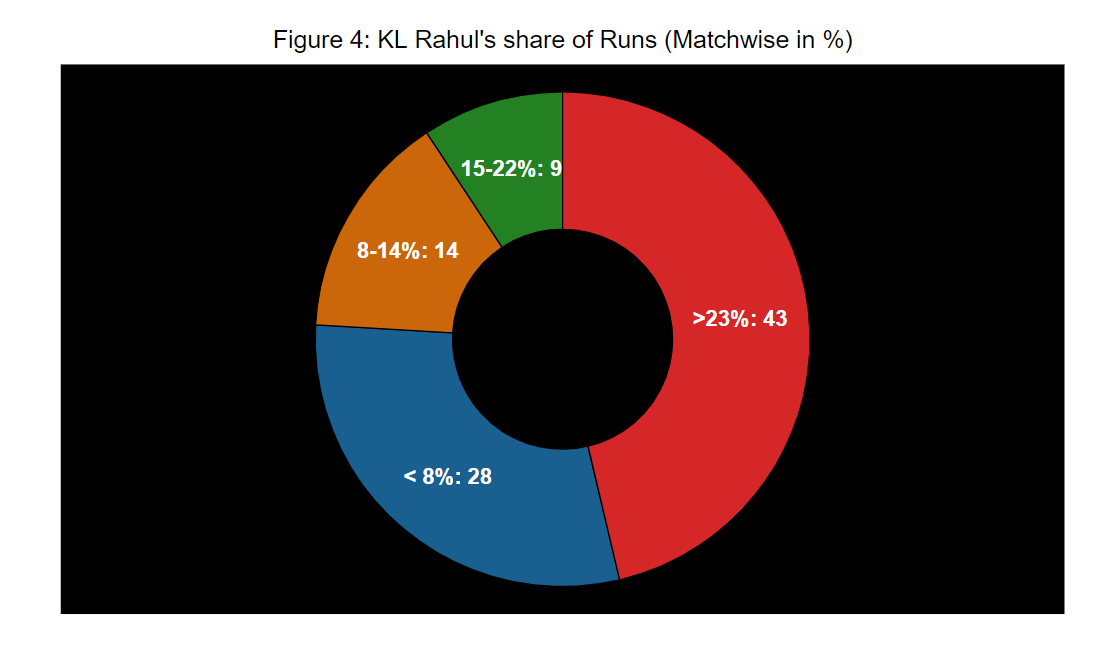

## 3.2 against SRH bowlers
### Fast bowlers are lethal to the KL Rahul's style of batting(Right Handed batsman)
### Fast bowlers of  SRH are: Sandeep Sharma, JO Holder, T Natarajan
### Rashid Khan is a leg spinner bit has shown a great performance against all batting styles in past

## we need to calculate individual performances of KXIP batsmen and find the total score

In [171]:
KXIP = deliveries[deliveries.batsman.isin(KXIP_batsmen)]
k1 = KXIP.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
k2  = KXIP.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
k1["runs_scored"] = k2.runs_scored

bats = []
balls =[]
runs = []
for batsman in k1.batsman.unique():
    b = k1[k1.batsman == batsman]
    #print(batsman)
    #print(b)
    bats.append(batsman)
    balls.append(b.balls_faced.mean())
    runs.append(b.runs_scored.mean())
    #print("#################################################")

kxip = pd.DataFrame(list(zip(bats, balls, runs)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])
kxip

,batsman,balls_faced,runs_scored
0,CH Gayle,25.250000,36.774194
1,DJ Hooda,9.577778,11.888889
2,MA Agarwal,14.263889,17.722222
3,GJ Maxwell,13.462687,20.940299
4,KL Rahul,25.258621,34.706897
5,JDS Neesham,15.333333,14.000000
6,N Pooran,18.333333,29.500000


In [172]:
import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='polar',sharing='public',offline=True)
kxip.iplot(kind="bar",x = "batsman",
                subplots=True,
                sortbars=True,
                keys = ["balls_faced","runs_scored"],
                title="Figure 4: Average balls faced and runs scored by KXIP batsmen in IPL",
                theme="polar")

In [173]:
print("totals runs scored could be : ", round(kxip.runs_scored.sum(),1))
print("KL Rahul's share is: ", round((kxip[kxip.batsman == "KL Rahul"].runs_scored.values[0]/kxip.runs_scored.sum())*100,1))

totals runs scored could be :  165.5
KL Rahul's share is:  21.0


## 3.3 Agaisnt SRH bowlers

In [174]:
KXIP_s = deliveries[(deliveries.batsman.isin(KXIP_batsmen)) & (deliveries.bowler.isin(SRH_bowlers))]
k1_ = KXIP_s.groupby(['batsman', 'bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
k2_  = KXIP_s.groupby(['batsman','bowler'])['batsman_runs'].sum().reset_index(name = "runs_scored")
k1_["runs_scored"] = k2_.runs_scored


In [278]:
import numpy as np
import cufflinks as cf

k_b = []
balls = []
runs = [] 
for count,i in enumerate(k1_.batsman.unique(),5):
    pl = k1_[k1_.batsman == i]
    k_b.append(i)
    balls.append(pl.balls_faced.mean())
    runs.append(pl.runs_scored.mean())
    t1 = "Figure: " + str(count) + " Performance of " + i + " Against SRH bowlers"
    cf.set_config_file(theme='polar',sharing='public',offline=True)
    pl.iplot(kind="bar",x = "bowler",
                subplots=True,
                sortbars=True,
                keys = ["balls_faced","runs_scored"],
                title=t1,
                theme="polar")

In [178]:
total_runs_kxip = pd.DataFrame(list(zip(k_b, balls, runs)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])
total_runs_kxip

,batsman,balls_faced,runs_scored
0,CH Gayle,20.25,30.250000
1,DJ Hooda,3.50,4.500000
2,GJ Maxwell,2.50,1.500000
3,KL Rahul,21.50,18.500000
4,MA Agarwal,18.00,17.666667
5,N Pooran,2.00,0.000000


In [181]:
print("Average score of team against SRH bowlers is:", round((total_runs_kxip[total_runs_kxip.batsman == "KL Rahul"].runs_scored.values[0]/total_runs_kxip.runs_scored.sum())*100))

Average score of team against SRH bowlers is: 26.0


### Outcomes<br> Part 3.1 : KL Rahul's share of runs would be more than 23%<br> Part 3.2 : KL Rahul's share of runs = 21%<br>Part 3.3 : KL Rahul's share of runs would be more than 23%


## Conclusion: KL Rahul's share will be more than 23%

# Question 4: How many balls would SRH take to reach 50 runs on team total?
options: [Less than 30 balls, 30-36 balls, 37-42 balls, 43 balls or more]

## 4.1

In [221]:
srh = deliveries[deliveries.batsman.isin(SRH_batsmen)]
srh1 = srh.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
srh2 = srh.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
srh1["runs_scored"] = srh2.runs_scored
b = []
balls =[]
runs = []
for i in srh1.batsman.unique():
    b.append(i)
    balls.append(srh1[srh1.batsman ==i].balls_faced.mean())
    runs.append(srh1[srh1.batsman ==i].runs_scored.mean())
SRH_bats = pd.DataFrame(list(zip(b, balls, runs)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])    
print("Average number of balls faced and runs scored by SRH batsmen\n\n", SRH_bats)


Average number of balls faced and runs scored by SRH batsmen

          batsman  balls_faced  runs_scored
0      DA Warner    26.968254    37.626984
1      MK Pandey    20.378151    24.134454
2      V Shankar    15.888889    21.259259
3  Mohammad Nabi     9.500000    14.600000
4  KS Williamson    23.926829    32.170732
5      JO Holder     6.400000     7.600000
6     J Bairstow    29.300000    46.800000


## 4.2

## Powerplay batsmen of SRH are <br> J Bairstow,<br>DA Warner, <br>MK Pandey
## Baistow and Pandey are Right handed batsman -  so mostly Fast bowlers like Shami , A singh, J Neesham will be more lethal for them
## DA Warner is a Left handed batsman and most lethal bowler against him is : Off spinner , hence most suitable option is : G Maxwell

## Hence we will analyze data for <br>SRH batsman (Baisrstow, Warner, Pandey) [Against] <br>KXIP bowlers(Shami, A singh, J Neesham, G Maxwell)

In [234]:
SRH_pp = ['J Bairstow', 'DA Warner', 'MK Pandey']
KXIP_bowl = ['Mohammed Shami', 'A Singh', 'JDS Neesham', 'GJ Maxwell']
SK = deliveries[(deliveries.batsman.isin(SRH_pp)) & (deliveries.bowler.isin(KXIP_bowl)) & (deliveries.over <= 8)]
sk1 = SK.groupby(['batsman','bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
sk2 = SK.groupby(['batsman','bowler'])['batsman_runs'].sum().reset_index(name = "runs_scored")
sk1["runs_scored"] = sk2.runs_scored
sk1

,batsman,bowler,balls_faced,runs_scored
0,DA Warner,A Singh,14,13
1,DA Warner,GJ Maxwell,14,20
2,DA Warner,Mohammed Shami,15,17
3,MK Pandey,A Singh,6,6
4,MK Pandey,GJ Maxwell,2,1
5,MK Pandey,JDS Neesham,7,10
6,MK Pandey,Mohammed Shami,18,15


In [235]:
# J Bairstow has not faced these bowlers hence we need to consider average strike rate of him
s = deliveries[(deliveries.batsman == 'J Bairstow') & (deliveries.over <=8)] 
sh1 = s.groupby(['match_id'])['batsman_runs'].count().reset_index(name = "balls_faced")
sh2 = s.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs_scored")
sh1["runs_scored"] = sh2.runs_scored

print('J Bairstow')
print("average balls faced : ", round(sh1.balls_faced.mean(),1), "\naverage runs scored : ", round(sh1.runs_scored.mean(),1))
print("average strike rate is : ", round((sh1.runs_scored.values[0]*100/sh1.balls_faced.values[0]),1))
print("###############################################")
   

for i in sk1.batsman.unique():
    i1 = sk1[sk1.batsman == i]
    print(i)
    print("average balls faced : ", round(i1.balls_faced.mean(),1), "\naverage runs scored : ", round(i1.runs_scored.mean(),1))
    print("average strike rate is : ", round((i1.runs_scored.sum()*100/i1.balls_faced.sum()),1))
    print("###############################################")
    


J Bairstow
average balls faced :  18.0 
average runs scored :  25.7
average strike rate is :  113.6
###############################################
DA Warner
average balls faced :  14.3 
average runs scored :  16.7
average strike rate is :  116.3
###############################################
MK Pandey
average balls faced :  8.2 
average runs scored :  8.0
average strike rate is :  97.0
###############################################


### From above data we could say that SRH would need 30-36 balls to score their 50 runs

## 4.3  Partnership Runs 

In [251]:
partner = deliveries[(deliveries.batsman.isin(SRH_pp)) & (deliveries.non_striker.isin(SRH_pp))]
partner_srh = partner[["match_id","batsman", "non_striker", "batsman_runs"]]
ps1 = partner_srh.groupby(['match_id','batsman', 'non_striker'])['batsman_runs'].count().reset_index(name = "balls_faced")
ps2 = partner_srh.groupby(['match_id','batsman', 'non_striker'])['batsman_runs'].sum().reset_index(name = "partnership_runs")
ps1["partnership_runs"] = ps2.partnership_runs


In [258]:
# Bairstow - Warner Partnership
BW = ps1[((ps1.batsman == 'J Bairstow') &(ps1.non_striker == 'DA Warner')) | ((ps1.non_striker == 'J Bairstow') & (ps1.batsman == 'DA Warner'))]
print(BW.balls_faced.mean(), BW.partnership_runs.mean())

25.0 39.75


In [255]:
# Warner- Pandey partnership

WP = ps1[((ps1.batsman == 'DA Warner') &(ps1.non_striker == 'MK Pandey')) | ((ps1.non_striker == 'DA Warner') & (ps1.batsman == 'MK Pandey'))]
print(WP.balls_faced.mean(), WP.partnership_runs.mean())

27.25 40.875


## Conclusion: Hence from above analysis it is clear that it would take 30-36 balls for SRH to score 50

# Question 5: How many runs will Chris Gayle score in the first 10 balls he faces? If he gets out before playing 10 balls, then the number of runs he scores until he gets out will be considered.
options: [0-10, 11-18, 18-26, 27 or more

In [277]:
gayle = deliveries[deliveries.batsman == 'CH Gayle']
g1 = gayle[["match_id", "batsman", "ball", "batsman_runs"]].groupby(['match_id'])['ball'].count().reset_index()
g1_List = g1[g1.ball<10].match_id.unique()
g1_L = gayle[["match_id", "batsman", "batsman_runs"]][gayle.match_id.isin(g1_List)]

g2_List = g1[g1.ball >=10].match_id.unique()
g2_G = gayle[["match_id", "batsman","ball" ,"batsman_runs"]][gayle.match_id.isin(g2_List)]

mid = []
runs_10b = []
for i in g2_G.match_id.unique():
    mid.append(i)
    temp = g2_G[g2_G.match_id == i].reset_index()
    runs_10b.append(temp[temp.index <=10].batsman_runs.sum())

g2_G_ =  pd.DataFrame(list(zip(mid, runs_10b)), 
               columns =['match_id', 'batsman_runs'])

g1_L_ = g1_L.groupby(['match_id'])['batsman_runs'].sum().reset_index()
f = [g1_L_, g2_G_]
gayle_score_10b = pd.concat(f)
gayle_score_10b["index"]  = gayle_score_10b.index

In [279]:
import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='polar',sharing='public',offline=True)
gayle_score_10b.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["batsman_runs"],
                title="Figure 11: Runs scored by Gayle in 1st 10 balls he played in IPL",
                theme="polar")

In [280]:
gayle_score_10b.batsman_runs.values

array([ 6,  0,  0,  7,  4,  7,  0,  0,  8,  0,  2,  8,  4,  6, 11,  4, 20,
        4,  6, 10,  1,  1,  0,  7,  5,  1,  2,  0,  6,  4, 21,  7, 17,  2,
        8, 15, 10, 10,  6, 12, 14,  4,  5, 14, 20, 15, 20, 12, 19, 22, 14,
        5, 28, 13, 38, 21, 28, 10,  8, 10, 14, 15,  5,  6, 10,  9, 27,  4,
       12,  4, 14,  9, 22,  9, 23, 10,  4, 10,  7, 13, 16, 10, 24,  7, 14,
        5,  7,  7, 17,  1,  9, 13, 21, 21, 12, 15, 35, 11, 10,  6,  9,  7,
        9, 11, 16, 18, 19, 10, 10,  8, 14, 10, 18, 10, 11, 18, 15, 19, 10,
       17, 28, 24, 13,  6], dtype=int64)

In [283]:
gayle_score_10b.batsman_runs.mode()

0    10
dtype: int64

In [285]:
gayle_score_10b.batsman_runs.mean()

11.129032258064516

In [286]:
gayle_score_10b.batsman_runs.median()

10.0

## 5.2 Against SRH bowlers
### He will mostly face Rashid Khan as he is Leg spinner and lethal to Gayle's batting style(Left handed)
### 2nd bowler he faces is V Shankar who is Medium Fast bowlers

In [290]:
Gayle_bowler_lethal = ['Rashid Khan', 'V Shankar']


In [303]:
gayle_ = deliveries[(deliveries.batsman == 'CH Gayle') & (deliveries.bowler.isin(Gayle_bowler_lethal))]
g_l1 = gayle_[["match_id", "batsman","bowler", "ball", "batsman_runs"]]
# strike rate
g_l1.batsman_runs.max()*100/g_l1.ball.max()

100.0

In [305]:
# we will go with the Average runs by Gayle in 1st 10 balls as 5.2 data won't be useful as data against V shankar is not availabe
gayle_score_10b.batsman_runs.mean()

11.129032258064516

## Hence, Gayle will score 11 -18 runs in 1st 10 balls he faces 